In [1]:
import os
import ee
import json
import requests
import requests_cache
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ee.Initialize()

In [2]:
### CARTO TABLE NAME: bra_biomas_land_classification_test 

In [3]:
class_dict = {
    
    '3': 'Forest Formations',
    '4': 'Savannah',
    '5': 'Mangrove',
    '9': 'Planted Forest',
    '11': 'Non-Forest Wetlands',
    '12': 'Grassland',
    '13': 'Other Non-forest Vegetation',
    '15': 'Pasture',
    '18': 'Agriculture',
    '21': 'Pasture or Agriculture',
    '23': 'Beaches or Dunes',
    '24': 'Urban Infrastructure',
    '25': 'Other Non-vegetated Area',
    '26': 'Water Bodies',
    '27': 'Unobserved',   
    '1': 'Unknown',
    '2': 'Unknown',
    '10': 'Unknown',
    '14': 'Unknown',
    '22': 'Unknown',
 #------------------------#   
    '6': 'Unknown',
    '7': 'Unknown',
    '8': 'Unknown',
    '16': 'Unknown',
    '17': 'Unknown',
    '19': 'Unknown',
    '20': 'Unknown'
    
}

In [4]:
def classification_year_queries(adm0='BRA', adm1=None, adm2 = None):
    if adm2:
        print('Request for adm2 area')
        sql = (f"SELECT class2000, class2001, class2002, class2003, class2004, class2005, class2006, class2007, "
               "class2008, class2009, class2010, class2011, class2012, class2013, class2014, class2015, class2016 "
               f"FROM bra_biomas_land_classification_test "
               f"WHERE iso = '{adm0}' "
               f"AND adm1 = {adm1} "
               f"AND adm2 = {adm2} ")
        return sql
               
    elif adm1:
        print('Request for  adm1 area')
        sql = (f"SELECT class2000, class2001, class2002, class2003, class2004, class2005, class2006, class2007, "
               "class2008, class2009, class2010, class2011, class2012, class2013, class2014, class2015, class2016 "
               f"FROM bra_biomas_land_classification_test "
               f"WHERE iso = '{adm0}' "
               f"AND adm1 = {adm1} ")
        return sql
               
    elif adm0:
        print('Request for  adm0 area')
        sql = (f"SELECT class2000, class2001, class2002, class2003, class2004, class2005, class2006, class2007, "
               "class2008, class2009, class2010, class2011, class2012, class2013, class2014, class2015, class2016 "
               f"FROM bra_biomas_land_classification_test "
               f"WHERE iso = '{adm0}' ")
        return sql

In [5]:
def str_to_dict(string):
    tmp_str = string.replace("'", '"')
    tmp_obj = json.loads(tmp_str)
    return tmp_obj

In [6]:
def cleanData(data):
    tmp_list = []
    for d in data:
        tmp = {}
        for k, v in d.items():
            tmp[k] = str_to_dict(v)
        tmp_list.append(tmp)
    return tmp_list

In [7]:
def buildTotal(data):
    years = {}
    for k in data[0].keys():
        years[k] = {}

    for d in data:
        for k,v in d.items():
            for y in years.keys():
                if y == k:
                    for d in v:
                        c_name = class_dict[d.get('classification')]
                        area = d.get('area')
                        if not years.get(k).get(c_name):
                            years.get(k)[c_name] = 0
                        years.get(k)[c_name] += area
    return_list = []                    
    for k,v in years.items():
        return_list.append({'year': k, 'data': v})
        
    return return_list

In [8]:
def getData(data):
    return_list = []
    for d in data:
        total = 0
        tmp_list = []
        for k,v in d.get('data').items():
            total += v

        for k,v in d.get('data').items():
            tmp_list.append({'name': k, 'area_m2': v, 'area_%':100*v/total})
        return_list.append({'year': d.get('year'), 'data': sorted(tmp_list, key=lambda k: k['name'])})

    return return_list

In [69]:
def insertZeroes(data):
    return data

In [87]:
def makePlot(adm1, adm2=None):
    
    account = 'wri-01'
    urlCarto = "https://{0}.carto.com/api/v2/sql".format(account)

    sql = classification_year_queries('BRA',adm1,adm2)
    sql = {"q": sql}
    r = requests.get(urlCarto, params=sql)
    print(r.url,'\n')
    # pprint(r.json())
    raw = r.json().get('rows')
    data = getData(buildTotal(cleanData(r.json().get('rows')))) 
# create data structure
    x_data = list(range(2000,2017))
    y_data = []

    N = len(data[0].get('data'))
    for i in range(0,N):
        tmp = []
        for d in data:
            tmp.append(d.get('data')[i].get('area_m2')/1e6)
        y_data.append(tmp)

    labels = []
    for d in data[0].get('data'):
        labels.append(d.get('name'))

    plt.figure(figsize=(20,10))

    plt.stackplot(x_data,y_data, labels=labels)
    plt.legend(loc='lower left')

    plt.show()

In [102]:
account = 'wri-01'
urlCarto = "https://{0}.carto.com/api/v2/sql".format(account)

sql = classification_year_queries('BRA',11,None)
sql = {"q": sql}
r = requests.get(urlCarto, params=sql)
print(r.url,'\n')
# pprint(r.json())
raw = r.json().get('rows')
data = getData(buildTotal(cleanData(r.json().get('rows')))) 

Request for  adm1 area
https://wri-01.carto.com/api/v2/sql?q=SELECT+class2000%2C+class2001%2C+class2002%2C+class2003%2C+class2004%2C+class2005%2C+class2006%2C+class2007%2C+class2008%2C+class2009%2C+class2010%2C+class2011%2C+class2012%2C+class2013%2C+class2014%2C+class2015%2C+class2016+FROM+bra_biomas_land_classification_test+WHERE+iso+%3D+%27BRA%27+AND+adm1+%3D+11+ 



Request for  adm1 area
https://wri-01.carto.com/api/v2/sql?q=SELECT+class2000%2C+class2001%2C+class2002%2C+class2003%2C+class2004%2C+class2005%2C+class2006%2C+class2007%2C+class2008%2C+class2009%2C+class2010%2C+class2011%2C+class2012%2C+class2013%2C+class2014%2C+class2015%2C+class2016+FROM+bra_biomas_land_classification_test+WHERE+iso+%3D+%27BRA%27+AND+adm1+%3D+1+ 



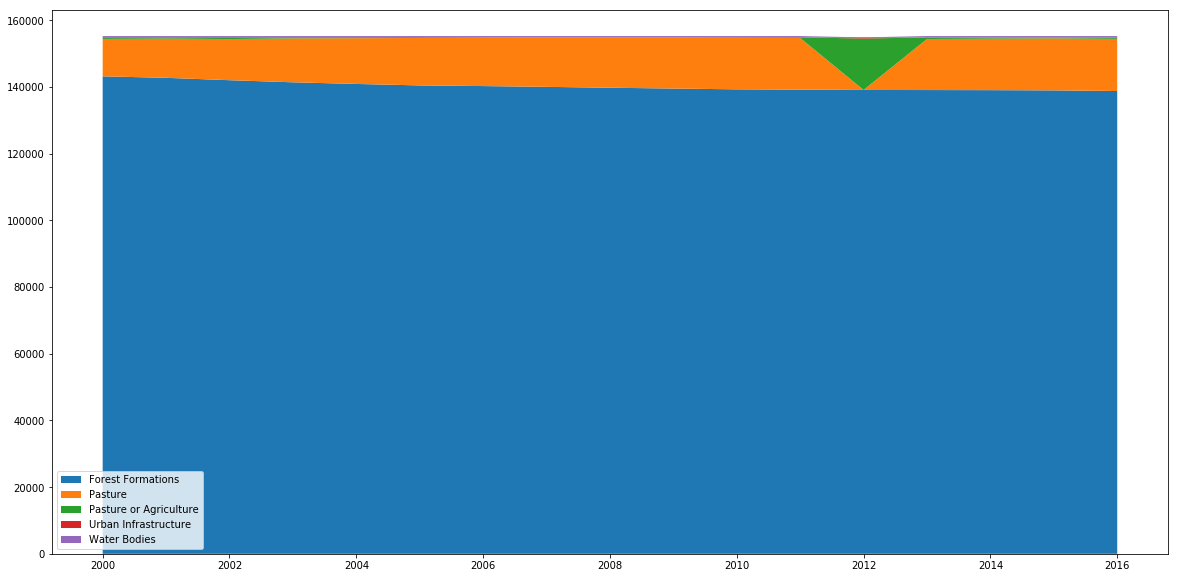

In [103]:
makePlot(1)